In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
classifier = Sequential()

classifier.add(Conv2D(24, (3, 3), input_shape = (94, 94, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(24, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(24, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [3]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Govt Project/CovidXray2/Pediatric Chest X-ray Pneumonia/train',
                                                 target_size = (94, 94),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1300 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Govt Project/CovidXray2/Pediatric Chest X-ray Pneumonia/test',
                                            target_size = (94, 94),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 370 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set,
                         epochs =25,
                         validation_data = test_set,
                         validation_steps = 1000)

Epoch 1/25
41/41 [==============================] - 228s 6s/step - loss: 0.6587 - accuracy: 0.6100 - val_loss: 0.6484 - val_accuracy: 0.3919
Epoch 2/25
41/41 [==============================] - 231s 6s/step - loss: 0.5429 - accuracy: 0.7177 - val_loss: 0.3627 - val_accuracy: 0.7756
Epoch 3/25
41/41 [==============================] - 230s 6s/step - loss: 0.4927 - accuracy: 0.7808 - val_loss: 0.2740 - val_accuracy: 0.8325
Epoch 4/25
41/41 [==============================] - 231s 6s/step - loss: 0.3817 - accuracy: 0.8331 - val_loss: 0.2887 - val_accuracy: 0.8461
Epoch 5/25
41/41 [==============================] - 232s 6s/step - loss: 0.3477 - accuracy: 0.8308 - val_loss: 0.5365 - val_accuracy: 0.8081
Epoch 6/25
41/41 [==============================] - 232s 6s/step - loss: 0.3315 - accuracy: 0.8785 - val_loss: 0.3202 - val_accuracy: 0.8405
Epoch 7/25
41/41 [==============================] - 252s 6s/step - loss: 0.3080 - accuracy: 0.8708 - val_loss: 0.3710 - val_accuracy: 0.8486
Epoch 8/25
41

In [8]:
import numpy as np
from keras.preprocessing import image

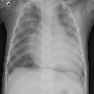

In [10]:
test_image=image.load_img('C:/Users/gaurav sahani/Desktop/Govt Project/CovidXray2/Pediatric Chest X-ray Pneumonia/train/PNEUMONIA/1.jpeg', target_size = (94, 94))
test_image

In [11]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis = 0)

In [12]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [14]:
classifier.save('GovCovidXray.h5')